In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


# DATASETS MUST BE PUT INTO /content/ PATH TO WORK
df_education_csv = pd.read_csv("/content/education.csv", encoding='latin1')
df_police_killing_test = pd.read_csv("/content/police_killings_test.csv")
df_police_killings_train_csv = pd.read_csv("/content/police_killings_train.csv")
df_poverty_csv = pd.read_csv("/content/poverty.csv", encoding='latin1')
df_share_race_by_city_csv = pd.read_csv("/content/share_race_by_city.csv")
df_income_csv = pd.read_csv("/content/income.csv", encoding='latin1')

df_police_killing_test.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2261,Kevin Darnell Washington,25/01/17,shot,gun,54.0,M,B,Southaven,MS,False,attack,Not fleeing,False
1,2262,Donovan Paul Scheurich,25/01/17,shot,gun,50.0,M,W,Millston,WI,True,attack,Not fleeing,True
2,2265,Josue Javier Diaz,26/01/17,shot,gun,28.0,M,H,Charlotte,NC,False,other,Car,False
3,2266,Kerry Lee Coomer,26/01/17,shot,gun,59.0,M,W,Overlea,MD,True,attack,Not fleeing,True
4,2267,Deaundre Phillips,26/01/17,shot,undetermined,24.0,M,B,Atlanta,GA,False,other,Car,True


# **CLEANING THE DATA (EDUCATION CSV)**

To clean this data set, I printed out a description of the data set first to inspect it. I printed out the amount of nulls, the values in the numeric column that may have issues being converted and the duplicated values. I then removed the nan values and duplicated values in the table.

In [ ]:
print(df_education_csv.info())
print("-----------------------\n\n")
print(df_education_csv.isnull().sum())
print("-----------------------\n\n")
print(df_education_csv.duplicated().sum())
print("-----------------------\n\n")
print(df_education_csv.describe)
print("-----------------------\n\n")

print(df_education_csv['percent_completed_hs'].value_counts(dropna=False))
# REPLACE - WITH NAN
df_education_csv['percent_completed_hs'] = df_education_csv['percent_completed_hs'].replace('-', np.nan)
# CONVERT PERCCENTAGES TO NUMBESR
df_education_csv['percent_completed_hs'] = pd.to_numeric(df_education_csv['percent_completed_hs'], errors='coerce')
# NOW FIND AKLL THE NULL VALUES AND DROP THEM SINCE THEY REPRESENT LESS THAN 1% OF THE TOAL DATA AND WILL BE INCONSEQUENTIAL
nan_count = df_education_csv['percent_completed_hs'].isnull().sum()
df_education_csv.dropna(subset=['percent_completed_hs'], inplace=True)

# REMOVEAANY DUPLICATE VALUES
initial_rows = df_education_csv.shape[0]
df_education_csv.drop_duplicates(inplace=True)
final_rows = df_education_csv.shape[0]

print(df_education_csv.info())
print("-----------------------\n\n")
print(df_education_csv.isnull().sum())
print("-----------------------\n\n")
print(df_education_csv.duplicated().sum())
print("-----------------------\n\n")
print(df_education_csv.describe)
print("-----------------------\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None
-----------------------


Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
-----------------------


0
-----------------------


<bound method NDFrame.describe of       Geographic Area                    City percent_completed_hs
0                  AL              Abanda CDP                 21.2
1                  AL          Abbeville city                 69.1
2                  AL         Adamsville city                 78.9
3                  AL            Addison town                 81.4
4                  AL              Akron town          

# **CLEANING DATA (POVERTY CSV)**

The same process used for the Education CSV was applied to the Poverty, Income, and Share Race by City CSVs.

In [ ]:
print(df_poverty_csv.info())
print("-----------------------\n\n")
print(df_poverty_csv.isnull().sum())
print("-----------------------\n\n")
print(df_poverty_csv.duplicated().sum())
print("-----------------------\n\n")
print(df_poverty_csv.describe)
print("-----------------------\n\n")


# REPLACE - VALUES WITH NAN VALUES AND THEN TURN TO NUMERIC VALUES, DROP NAN VALUES
print(df_poverty_csv['poverty_rate'].value_counts(dropna=False))
df_poverty_csv['poverty_rate'] = df_poverty_csv['poverty_rate'].replace('-', np.nan)
df_poverty_csv['poverty_rate'] = pd.to_numeric(df_poverty_csv['poverty_rate'], errors='coerce')

nan_count = df_poverty_csv['poverty_rate'].isnull().sum()
df_poverty_csv.dropna(subset=['poverty_rate'], inplace=True)

# REMOCE DUPLICATE VALUES
initial_rows_poverty = df_poverty_csv.shape[0]
df_poverty_csv.drop_duplicates(inplace=True)
final_rows_poverty = df_poverty_csv.shape[0]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None
-----------------------


Geographic Area    0
City               0
poverty_rate       0
dtype: int64
-----------------------


0
-----------------------


<bound method NDFrame.describe of       Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1
2                  AL         Adamsville city         25.5
3                  AL            Addison town         30.7
4                  AL              Akron town           42
...               ...                     ...          ...
29324            

# **CLEAN DATA (INCOME CSV)**

The same process used for the Education CSV

In [ ]:
print(df_income_csv.info())
print("-----------------------\n\n")
print(df_income_csv.isnull().sum())
print("-----------------------\n\n")
print(df_income_csv.duplicated().sum())
print("-----------------------\n\n")
print(df_income_csv.describe)
print("-----------------------\n\n")

# REPLCAES ALL X AND _ WITH NAN AND THEN DROP THEM
print(df_income_csv['Median Income'].value_counts(dropna=False))
df_income_csv['Median Income'] = df_income_csv['Median Income'].replace(['(X)', '-'], np.nan)
df_income_csv.dropna(subset=['Median Income'], inplace=True)
df_income_csv['Median Income'] = pd.to_numeric(df_income_csv['Median Income'], errors='coerce')

# REMOVE ALL DUPLICATE VALUES
initial_rows_income = df_income_csv.shape[0]
df_income_csv.drop_duplicates(inplace=True)
final_rows_income = df_income_csv.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
None
-----------------------


Geographic Area     0
City                0
Median Income      51
dtype: int64
-----------------------


0
-----------------------


<bound method NDFrame.describe of       Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317  

# **CLEAN DATA (SHARE RACE BY CITY CSV)**

The same process used for the Education CSV


In [ ]:
print(df_share_race_by_city_csv.info())
print("-----------------------\n\n")
print(df_share_race_by_city_csv.isnull().sum())
print("-----------------------\n\n")
print(df_share_race_by_city_csv.duplicated().sum())
print("-----------------------\n\n")
print(df_share_race_by_city_csv.describe)
print("-----------------------\n\n")

print(df_share_race_by_city_csv['share_white'].value_counts(dropna=False))
print(df_share_race_by_city_csv['share_black'].value_counts(dropna=False))
print(df_share_race_by_city_csv['share_asian'].value_counts(dropna=False))
print(df_share_race_by_city_csv['share_hispanic'].value_counts(dropna=False))

# IN ALL COLS REPLACE - AND X WITH NANS AND THEN DROP
columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
for col in columns:
    if '-' in df_share_race_by_city_csv[col].unique():
        df_share_race_by_city_csv[col] = df_share_race_by_city_csv[col].replace('-', np.nan)
    if '(X)' in df_share_race_by_city_csv[col].unique():
        df_share_race_by_city_csv[col] = df_share_race_by_city_csv[col].replace('(X)', np.nan)

#  THEN CONVERT TO NUMERIC VALUES
df_share_race_by_city_csv.dropna(subset=columns, inplace=True)
for col in columns:
    df_share_race_by_city_csv[col] = pd.to_numeric(df_share_race_by_city_csv[col], errors='coerce')
#  REPLACE/REMOVE DUPLICATES
initial_rows_share = df_share_race_by_city_csv.shape[0]
df_share_race_by_city_csv.drop_duplicates(inplace=True)
final_rows_share = df_share_race_by_city_csv.shape[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB
None
-----------------------


Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
-----------------------


0
-----------------------


<bound method NDFrame.describe of       Geographic area                    City share_white share_black  \

# **CLEANING THE DATA (POLICE KILLINGS TEST)**


To clean this data, I first normalized the data times. After this, I removed the null armed and fleeing values, since they represented a tiny proportion of the actual data. After this, I replaced the null age values with the median age of all perpetrators in the data, and the null race values with the mode of the race for the entire dataset.

In [ ]:
print(df_police_killing_test.info())
print("-----------------------\n\n")
print(df_police_killing_test.isnull().sum())
print("-----------------------\n\n")
print(df_police_killing_test.duplicated().sum())
print("-----------------------\n\n")
print(df_police_killing_test.describe)
print("-----------------------\n\n")

print(df_police_killing_test['age'].value_counts(dropna=False))
print(df_police_killing_test['race'].value_counts(dropna=False))
print(df_police_killing_test['armed'].value_counts(dropna=False))
print(df_police_killing_test['flee'].value_counts(dropna=False))

# CONVERT DATE TO STANDARD STAETIME OBJECT
df_police_killing_test['date'] = pd.to_datetime(df_police_killing_test['date'], format='%d/%m/%y')

# DROP THE NAN VALUES IN ARMED AND LFEE
df_police_killing_test.dropna(subset=['armed', 'flee'], inplace=True)

# REPLACE AGE WITH MEDIA AGE OF VICTIMS AS TO NOT AFFECT DATA SET TO HARSHLY
median_age = df_police_killing_test['age'].median()
df_police_killing_test['age'] = df_police_killing_test['age'].fillna(median_age)

# REPLACE RACE WITH THE MODE RACE TO NOT IOMPACT DATA TO HARSHLY(SHOULD I BE MORE RACIST AND ASUME BASED ON NAME OR SHOULD I JUST REMOVE IT??)
mode_race = df_police_killing_test['race'].mode()[0]
df_police_killing_test['race'] = df_police_killing_test['race'].fillna(mode_race)

# REPLACE DUPLICATES
initial_rows = df_police_killing_test.shape[0]
df_police_killing_test.drop_duplicates(inplace=True)
final_rows = df_police_killing_test.shape[0]

df_police_killing_test.rename(columns={'state': 'Geographic Area', 'city': 'City'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       507 non-null    int64  
 1   name                     507 non-null    object 
 2   date                     507 non-null    object 
 3   manner_of_death          507 non-null    object 
 4   armed                    504 non-null    object 
 5   age                      467 non-null    float64
 6   gender                   507 non-null    object 
 7   race                     403 non-null    object 
 8   city                     507 non-null    object 
 9   state                    507 non-null    object 
 10  signs_of_mental_illness  507 non-null    bool   
 11  threat_level             507 non-null    object 
 12  flee                     469 non-null    object 
 13  body_camera              507 non-null    bool   
dtypes: bool(2), float64(1), in

# **CLEANING THE DATA (POLICE KILLINGS TRAIN CSV)**

The same process was applied to the training CSV as the test CSV to maintain consistency between training and testing data.

In [ ]:
print(df_police_killings_train_csv.info())
print("-----------------------\n\n")
print(df_police_killings_train_csv.isnull().sum())
print("-----------------------\n\n")
print(df_police_killings_train_csv.duplicated().sum())
print("-----------------------\n\n")
print(df_police_killings_train_csv.describe)
print("-----------------------\n\n")

print(df_police_killings_train_csv['age'].value_counts(dropna=False))
print(df_police_killings_train_csv['race'].value_counts(dropna=False))
print(df_police_killings_train_csv['armed'].value_counts(dropna=False))
print(df_police_killings_train_csv['flee'].value_counts(dropna=False))

# CONVERT DATE TO STANDARD DATETIME OBJECT
df_police_killings_train_csv['date'] = pd.to_datetime(df_police_killings_train_csv['date'], format='%d/%m/%y')

# AGAIN DROP NULL VALUES OF ARMED AND FLEE BECAUSE THEY ARE SMALL
df_police_killings_train_csv.dropna(subset=['armed', 'flee'], inplace=True)

# REPLACE NULL AGE WITH MEDIA AGE
median_age_train = df_police_killings_train_csv['age'].median()
df_police_killings_train_csv['age'] = df_police_killings_train_csv['age'].fillna(median_age_train)

# REPLACE NULL RACE WITH MODE RACE
mode_race_train = df_police_killings_train_csv['race'].mode()[0]
df_police_killings_train_csv['race'] = df_police_killings_train_csv['race'].fillna(mode_race_train)

# REPLACE DUPLICATE VALUES IN TABLE
initial_rows_train = df_police_killings_train_csv.shape[0]
df_police_killings_train_csv.drop_duplicates(inplace=True)
final_rows_train = df_police_killings_train_csv.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2028 non-null   int64  
 1   name                     2028 non-null   object 
 2   date                     2028 non-null   object 
 3   manner_of_death          2028 non-null   object 
 4   armed                    2022 non-null   object 
 5   age                      1991 non-null   float64
 6   gender                   2028 non-null   object 
 7   race                     1937 non-null   object 
 8   city                     2028 non-null   object 
 9   state                    2028 non-null   object 
 10  signs_of_mental_illness  2028 non-null   bool   
 11  threat_level             2028 non-null   object 
 12  flee                     2001 non-null   object 
 13  body_camera              2028 non-null   bool   
dtypes: bool(2), float64(1), 

# **MERGE THE CODE**

First i had to standardize capitalization in share by race by capitalizing a in geographic area. Then, I changed State in the police killings csv to ensure that all the columns with the same information had the same title. Following this, I looped through all the data frames and replace the suffixes for the cities.

To merge, I did a left merge with the the csvs

In [ ]:
# CAPITALIZE a IN GEOGRAPHIC area IN ORDER TO MATCH OTHER CVS
df_share_race_by_city_csv.rename(columns={'Geographic area': 'Geographic Area'}, inplace=True)

# REPLACE DATA WITH GEOGRAPHIC AREA TO MATCH 4 OTHER CSVS
df_police_killing_test.rename(columns={'state': 'Geographic Area', 'city': 'City'}, inplace=True)
df_police_killings_train_csv.rename(columns={'state': 'Geographic Area', 'city': 'City'}, inplace=True)

# GO THROUGH ALL DATAFRAMES AND NORMALIZE CAPITALIZATION IN DATA AND REMOVE SUFFIXES SO EVERYTHING IS THE SAME
dfs = [
  df_education_csv,
  df_poverty_csv,
  df_income_csv,
  df_share_race_by_city_csv,
  df_police_killing_test,
  df_police_killings_train_csv
]

remove = [
    ' city', ' town', ' CDP', ' village', ' borough', ' municipality', ' for'
]

for df in dfs:
    df['City'] = df['City'].str.lower()
    for suffix in remove:
        df['City'] = df['City'].str.replace(suffix, '', regex=False)
    df['City'] = df['City'].str.strip()


# merge the 4 extra data frames and print
df_addition_information = pd.merge(df_education_csv, df_poverty_csv, on=['Geographic Area', 'City'], how='left')
df_addition_information = pd.merge(df_addition_information, df_income_csv, on=['Geographic Area', 'City'], how='left')
df_addition_information = pd.merge(df_addition_information, df_share_race_by_city_csv, on=['Geographic Area', 'City'], how='left')


print(df_addition_information.head())
print("-----------------------\n\n")
print(df_addition_information.info())

# MERGE PIOLICING KILLING DATA INTO ONE SET
df_police_killings = pd.concat([df_police_killings_train_csv, df_police_killing_test], ignore_index=True)

print(df_police_killings.head())
print("-----------------------\n\n")
print(df_police_killings.info())

#  MAKE A COMPLETE MERGE
df_merged_data = pd.merge(df_police_killings, df_addition_information, on=['Geographic Area', 'City'], how='left')
print(df_merged_data.head())



  Geographic Area        City  percent_completed_hs  poverty_rate  \
0              AL  abanda cdp                  21.2          78.8   
1              AL   abbeville                  69.1          29.1   
2              AL  adamsville                  78.9          25.5   
3              AL     addison                  81.4          30.7   
4              AL       akron                  68.6          42.0   

   Median Income  share_white  share_black  share_native_american  \
0        11207.0         67.2         30.2                    0.0   
1        25615.0         54.4         41.4                    0.1   
2        42575.0         52.3         44.9                    0.5   
3        37083.0         99.1          0.1                    0.0   
4        21667.0         13.2         86.5                    0.0   

   share_asian  share_hispanic  
0          0.0             1.6  
1          1.0             3.1  
2          0.3             2.3  
3          0.1             0.4  
4    

# **MOST DANGEROUS CITY**

1. The state that has the most fatal police shootings is california by far, with 415 total shootings, and then followed by Texas witb 217 shootings and Florida after with 164 shootings. The most dangerous City is Los Angeles, a city in California, followed by Pheonix and Houston.

2. The most common weapon of choice was a gun by an overwhelming margin with 1,385 people wielding guns, with the far second being a kinfe with only 364 people choosing a knife.

3. The average age was 36 years old with a standard deviation of 6-12 years. However, there was a fatal police killing for someone as young as 6 years old and as old as 91 years old. The race with the widest range was by far white as they had both the youngest and oldest death. Asians and Whites also had the oldest average age of some dying by police, with the other four being about the same median age, with
African Americans and Hispanics having more younger victims.

4. The number of people killed by race shows that the most of police killings happens to Whites, with about 1300 being white deaths, followed by African Americans with about 600 deaths, Hispanics with about 450 deaths, and the rest being less than 100 each. When looking at the proporitions however, Whites and Hispanics make up the same amount with both having 0.0006% of their population being killed in police acidents. African Americans make up the most with 0.0012% of their population being killed by police with asians having the lowest proportions with only 0.0001% of their population dying to police.

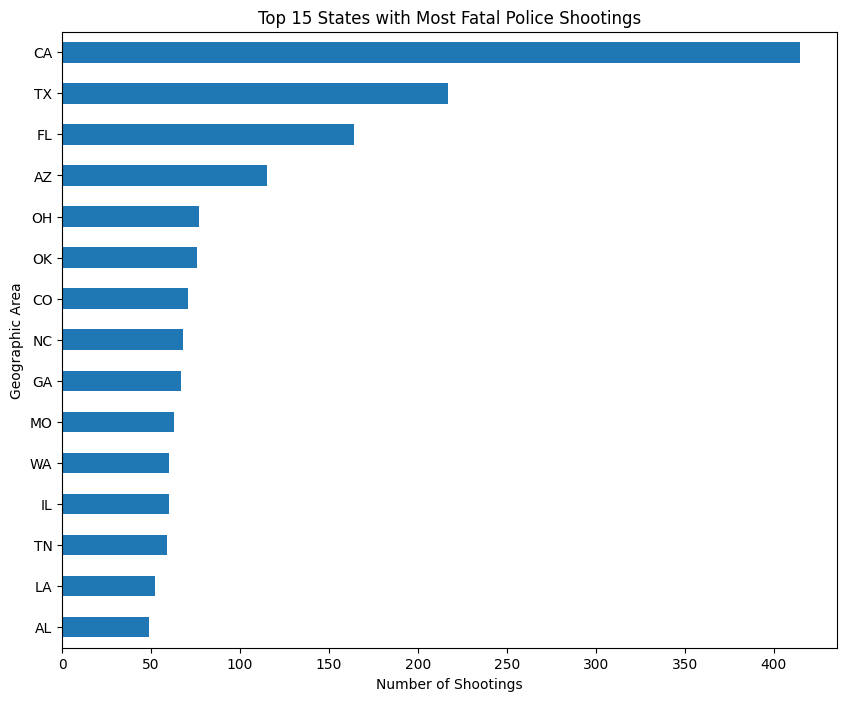

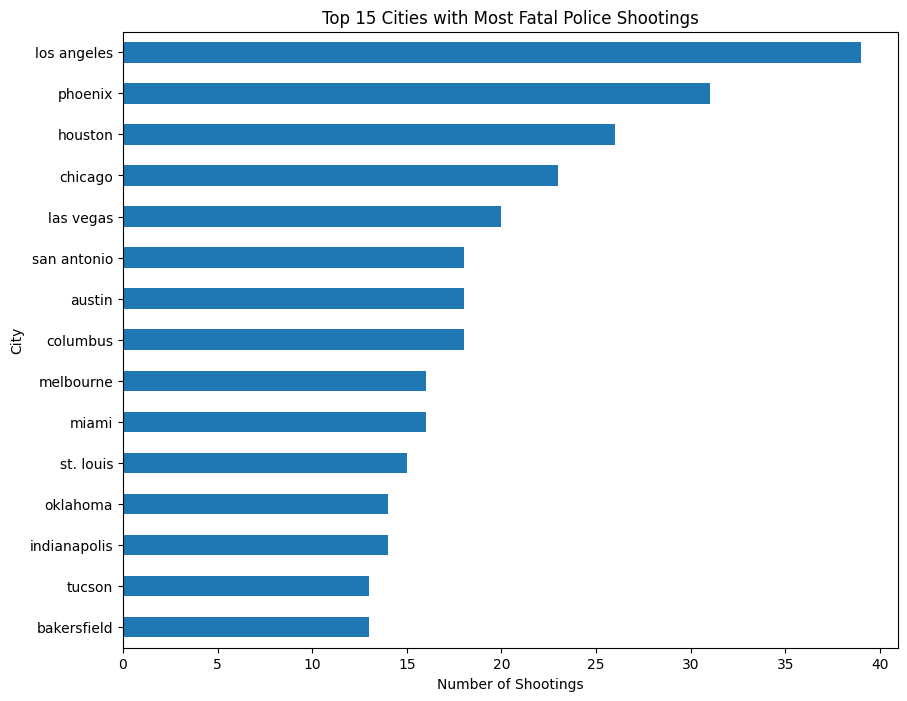

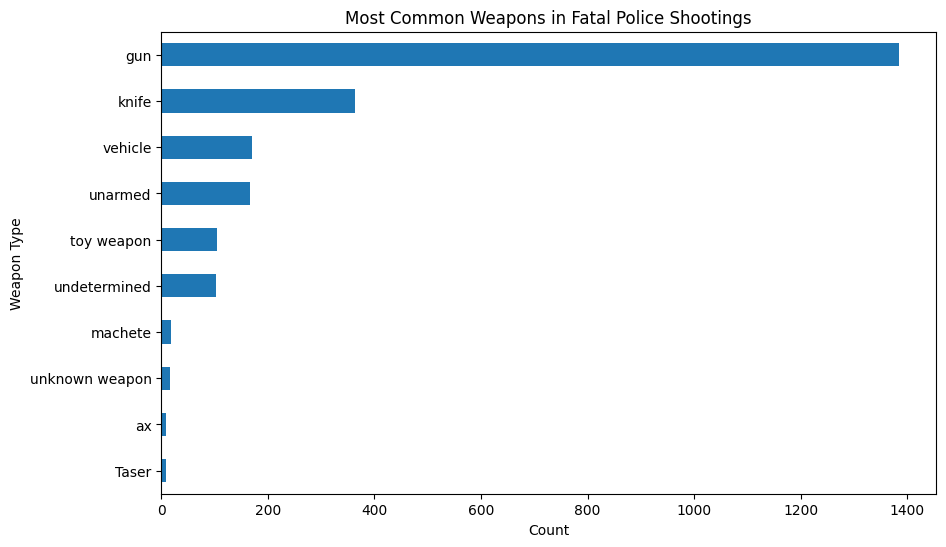

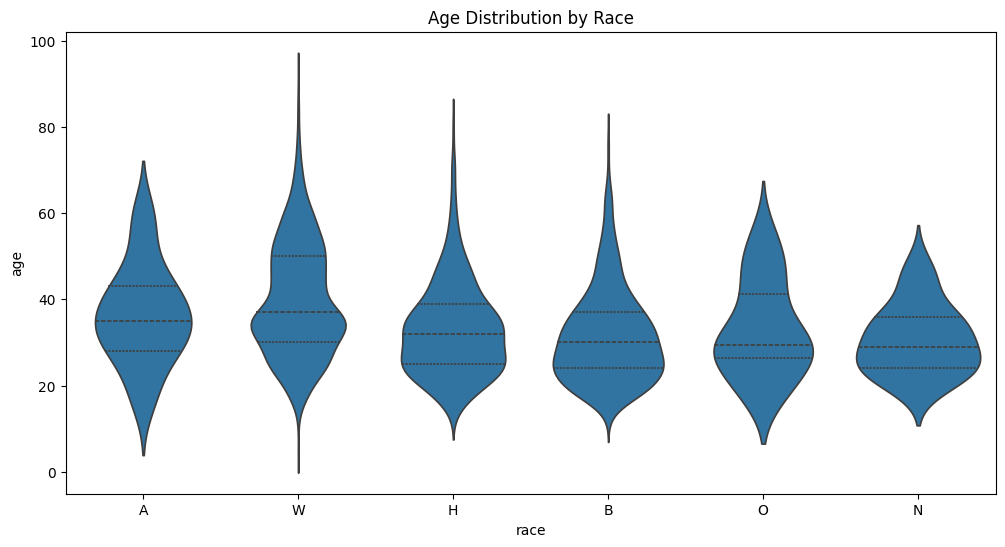

,0
race,
W,0.000006
B,0.000012
H,0.000006
A,0.000001
N,0.000010
O,0.000006


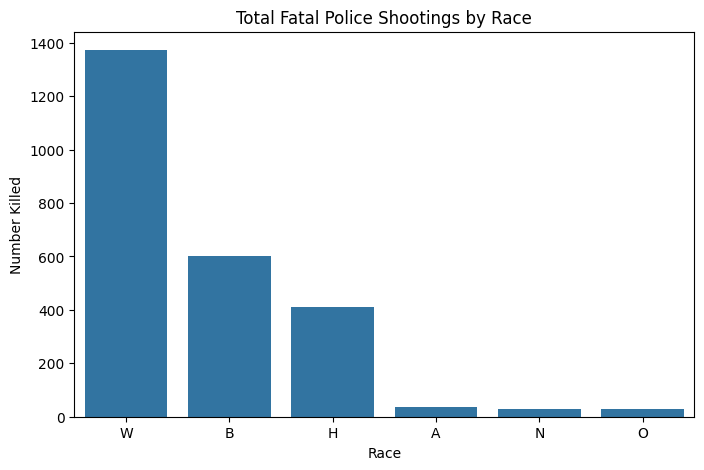

In [ ]:
# FILTER FOR MANER OF DEATH BEING SHOT AND THEN DISPLAY
fatal = df_merged_data[df_merged_data['manner_of_death'].str.contains('shot', case=False, na=False)]
fatal['Geographic Area'].value_counts().head(50)
plt.figure(figsize=(10,8))
fatal['Geographic Area'].value_counts().head(15).plot(kind='barh')
plt.title("Top 15 States with Most Fatal Police Shootings")
plt.xlabel("Number of Shootings")
plt.ylabel("Geographic Area")
plt.gca().invert_yaxis()
plt.show()

# FIND THE MOST DANGEROUS CITY
df_merged_data['City'].value_counts().head(10)
plt.figure(figsize=(10,8))
fatal['City'].value_counts().head(15).plot(kind='barh')
plt.title("Top 15 Cities with Most Fatal Police Shootings")
plt.xlabel("Number of Shootings")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.show()

# FIND THE MOST COMMON WEAPON
df_merged_data['armed'].value_counts().head(10)
plt.figure(figsize=(10,6))
fatal['armed'].value_counts().head(10).plot(kind='barh')
plt.title("Most Common Weapons in Fatal Police Shootings")
plt.xlabel("Count")
plt.ylabel("Weapon Type")
plt.gca().invert_yaxis()
plt.show()

# FIND MEDIAN AND AVERGAE AGES
df_merged_data['age'].describe()

# SHOW AGE DISTRIBUTION
plt.figure(figsize=(12,6))
sns.violinplot(data=fatal, x='race', y='age', inner='quartile')
plt.title("Age Distribution by Race")
plt.show()

# # FIND TOTAL NUMBER OF PEOPLE KILLED BY RACE AND PLOT IT
race = df_merged_data['race'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=race.index, y=race.values)
plt.title("Total Fatal Police Shootings by Race")
plt.xlabel("Race")
plt.ylabel("Number Killed")

# GOOGLED INFORMATION ON RACE POPULATIONS WITHIN UNITED STATES
population = {
    'W': 235_411_507,
    'B': 48_300_000,
    'H': 68_100_000,
    'A': 25_000_000,
    'N': 3_000_000,
    'O': 5_000_000
}

proportions = race / pd.Series(population)
proportions


In [ ]:
print(df_merged_data)

        id                name       date   manner_of_death       armed   age  \
0        3          Tim Elliot 2015-01-02              shot         gun  53.0   
1        4    Lewis Lee Lembke 2015-01-02              shot         gun  47.0   
2        5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0   
4        9   Michael Rodriguez 2015-01-04              shot    nail gun  39.0   
...    ...                 ...        ...               ...         ...   ...   
2473  2822    Rodney E. Jacobs 2017-07-28              shot         gun  31.0   
2474  2813               TK TK 2017-07-28              shot     vehicle  34.0   
2475  2818  Dennis W. Robinson 2017-07-29              shot         gun  48.0   
2476  2817       Isaiah Tucker 2017-07-31              shot     vehicle  28.0   
2477  2815        Dwayne Jeune 2017-07-31              shot       knife  32.0   

     gender race           

In [ ]:
model = df_merged_data.copy()

model.info()

label = LabelEncoder() #encoder to turn string -> numbers for machine to learn
model['encoded_race'] = label.fit_transform(model['race'].astype(str)) #encode the race


#dropping race, cause we are testing for it. Droping name, date, id since it would add extra noise for the machine to confuse itself on. We don't want the machine to thing all michaels are black. Body_camera i believe to be irrelevant noise to determining race of the perpetrator.
#the specific city and the geographic area as dropped since my initial model with these input values made the model too sensitive to each individual unique city or area.
#manner of death, armed, and signs of mental illness were removed progressively as I tested the models, and it seemed that these input features brought about more confusion than actual relationships to the models.


drop_colss = ['race', 'encoded_race', 'name', 'date', 'id', 'City', 'Geographic Area', 'body_camera', 'manner_of_death', 'armed', 'signs_of_mental_illness']
drop_cols = [col for col in drop_colss if col in model.columns]

x_val = model.drop(columns=drop_cols)
y_val = model['encoded_race']
x_val = pd.get_dummies(x_val, drop_first=True) #turn all the columns with string or object values into number

train_size = len(df_police_killings_train_csv) #first lines are training, then testing
#make training and testing sets
x_train = x_val.iloc[:train_size]
y_train = y_val.iloc[:train_size]

x_test = x_val.iloc[train_size:]
y_test = y_val.iloc[train_size:]

#impute missing values with the median
impute = SimpleImputer(strategy='median')
x_train = impute.fit_transform(x_train)
x_test = impute.transform(x_test)

#scaling the x input values for KNN
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"Training Shape: {x_train_scaled.shape}")
print(f"Testing Shape: {x_test_scaled.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2478 non-null   int64         
 1   name                     2478 non-null   object        
 2   date                     2478 non-null   datetime64[ns]
 3   manner_of_death          2478 non-null   object        
 4   armed                    2478 non-null   object        
 5   age                      2478 non-null   float64       
 6   gender                   2478 non-null   object        
 7   race                     2478 non-null   object        
 8   City                     2478 non-null   object        
 9   Geographic Area          2478 non-null   object        
 10  signs_of_mental_illness  2478 non-null   bool          
 11  threat_level             2478 non-null   object        
 12  flee                     2478 non-

BASELINE MODELS


In [ ]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train_scaled, y_train)
y_pred = dummy.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6058 (60.58%)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        76
           3       0.00      0.00      0.00         3
           5       0.61      1.00      0.75       292

    accuracy                           0.61       482
   macro avg       0.12      0.20      0.15       482
weighted avg       0.37      0.61      0.46       482



ACTUAL MODELS


In [ ]:
rand_forest = RandomForestClassifier(n_estimators = 1000, random_state = 40) #random forest with 100 different decision trees
log_model = LogisticRegression(max_iter = 10000, random_state = 40) #logisitic regression with 10000 iterations
knn_model = KNeighborsClassifier(n_neighbors = 10) #KNN

models = {
    "Random forest": rand_forest,
    "Logistic Regression": log_model,
    "KNN": knn_model
}

for name, model in models.items():
  model.fit(x_train_scaled, y_train) #train the model on the training data
  y_pred = model.predict(x_test_scaled) #have the trained model predict using test inputs
  accuracy = accuracy_score(y_test, y_pred) #check how accurate the model was

  print(f"Model: {name}")
  print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

  # The classification report helps you see how well it predicted SPECIFIC races
  # This is crucial for answering "Why is my model not accurate?"
  print(classification_report(y_test, y_pred, zero_division=0))



Model: Random forest
Accuracy: 0.5602 (56.02%)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.39      0.39      0.39       105
           2       0.39      0.39      0.39        76
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.69      0.68      0.69       292

    accuracy                           0.56       482
   macro avg       0.24      0.24      0.24       482
weighted avg       0.56      0.56      0.56       482

Model: Logistic Regression
Accuracy: 0.6411 (64.11%)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.51      0.50      0.50       105
           2       0.48      0.42      0.45        76
           3       0.00      0.00      0.00         3
           5       0.72      0.77      0.74       292

    accuracy                   

Logistic regression modeling algorithm performed the best with an overall accuracy of 64.11%, which bests the baseline model. Logistic regression is able to find linear relationships between input features and the desired output, and in this scenario, it worked out very well. I believed it worked well because many of the input features would correlate directly with the race of an individual, such as the share_race, where if a person lived in an area where a particular race was very high, it is much more likely they are of the same type of race. The same happens with income.

The random forest modeling algorithm creates decision trees to ask questions so that it can isolate groups, which it averages out. This algorithm wasn't able to beat the baseline. I thought it would be a good algorihtm to try since isolating individuals based on groups of their income and surrounding population seemed like a good idea. However, it is likely that providing all of the shared_race percentages as well as other input features overloaded the model with data so that it created unnecessarily complex rules to judge each individual with.

I thought K-nearest-neighbor would be a good algorithm to test, since it is likely that similar victims will likely share many qualities, and race might be one of them. KNN predicts the race of a victim based on how similar or close it is to another victim. This algorithm wasn't able to become better than the baseline model, and a reason for this could be that the input features of income and poverty rate might have some linear relationship with certain races, but it ultimately affects the crime rate of all races, so that many victims who were of very different races all appeared to be very similar, so the model assumed they would be the same race. This leads to very ambiguous results.